In [ ]:
# !git clone https://github.com/ultralytics/ultralytics
# %cd ultralytics
!pip install ultralytics
# %pip install -e '.[dev]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 14.4 MB/s eta 0:00:00


In [ ]:
# %cd ..

/


In [ ]:
# !git clone https://github.com/DepthAnything/Depth-Anything-V2
# %cd Depth-Anything-V2
# !pip install -r requirements.txt
# !wget https://huggingface.co/depth-anything/Depth-Anything-V2-Large/resolve/main/depth_anything_v2_vitl.pth
!git clone https://github.com/DepthAnything/Depth-Anything-V2
%cd Depth-Anything-V2/metric_depth
!pip install -r requirements.txt
# !wget https://huggingface.co/depth-anything/Depth-Anything-V2-Metric-Hypersim-Large/resolve/main/depth_anything_v2_metric_hypersim_vitl.pth
!wget https://huggingface.co/depth-anything/Depth-Anything-V2-Metric-VKITTI-Large/resolve/main/depth_anything_v2_metric_vkitti_vitl.pth

Cloning into 'Depth-Anything-V2'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 136 (delta 41), reused 34 (delta 34), pack-reused 70 (from 1)
Receiving objects: 100% (136/136), 45.17 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (44/44), done.
/Depth-Anything-V2/metric_depth
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsn

Upload Image

In [ ]:
# image_path = "../007.png"
image_path = "007.png"

# Object Detection ######################################

In [ ]:
# %cd ../../ultralytics

/content/ultralytics


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8l.yaml")  # build a new model from scratch
model = YOLO("yolov8l.pt")  # load a pretrained model (recommended for training)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 83.7M/83.7M [00:00<00:00, 102MB/s]


In [ ]:
# Use the model
results = model(image_path, save=True)  # predict on an image

results

NameError: name 'model' is not defined

# Depth Estimation ######################################

In [ ]:
# %cd ../Depth-Anything-V2
%cd ../Depth-Anything-V2/metric_depth

/content/Depth-Anything-V2/metric_depth


In [ ]:
# import cv2
# import torch

# from depth_anything_v2.dpt import DepthAnythingV2

# DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

# model_configs = {
#     'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
#     'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
#     'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
#     'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
# }

# encoder = 'vitl' # or 'vits', 'vitb', 'vitl', 'vitg'

# model = DepthAnythingV2(**model_configs[encoder])
# model.load_state_dict(torch.load(f'depth_anything_v2_{encoder}.pth', map_location='cpu'))
# model = model.to(DEVICE).eval()
import cv2
import torch

from depth_anything_v2.dpt import DepthAnythingV2

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024], 'max_depth': 100}
}

encoder = 'vitl' # or 'vits', 'vitb'
dataset = 'vkitti' # 'hypersim' for indoor model, 'vkitti' for outdoor model
max_depth = 80 # 20 for indoor model, 80 for outdoor model

# model = DepthAnythingV2(**{**model_configs[encoder], 'max_depth': max_depth})
model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'depth_anything_v2_metric_{dataset}_{encoder}.pth', map_location='cpu'))
model.eval()


<ipython-input-27-f247549ce331>:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'depth_anything_v2_metric_{dataset}_{encoder}.pth', map_l

DepthAnythingV2(
  (pretrained): DinoVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0-23): 24 x NestedTensorBlock(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): MemEffAttention(
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=1024, out_features=1024, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): LayerScale()
        (drop_path1): Identity()
        (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (drop): Dropout(p=0.0, inplace=Fal

In [ ]:
image_path = "../../007.png"

In [ ]:
raw_img = cv2.imread(image_path)
depth = model.infer_image(raw_img) # HxW raw depth map in numpy

NameError: name 'cv2' is not defined

In [ ]:
import numpy as np
# np.min(depth[361:, 821:])
depth[513, 949]

88.840096

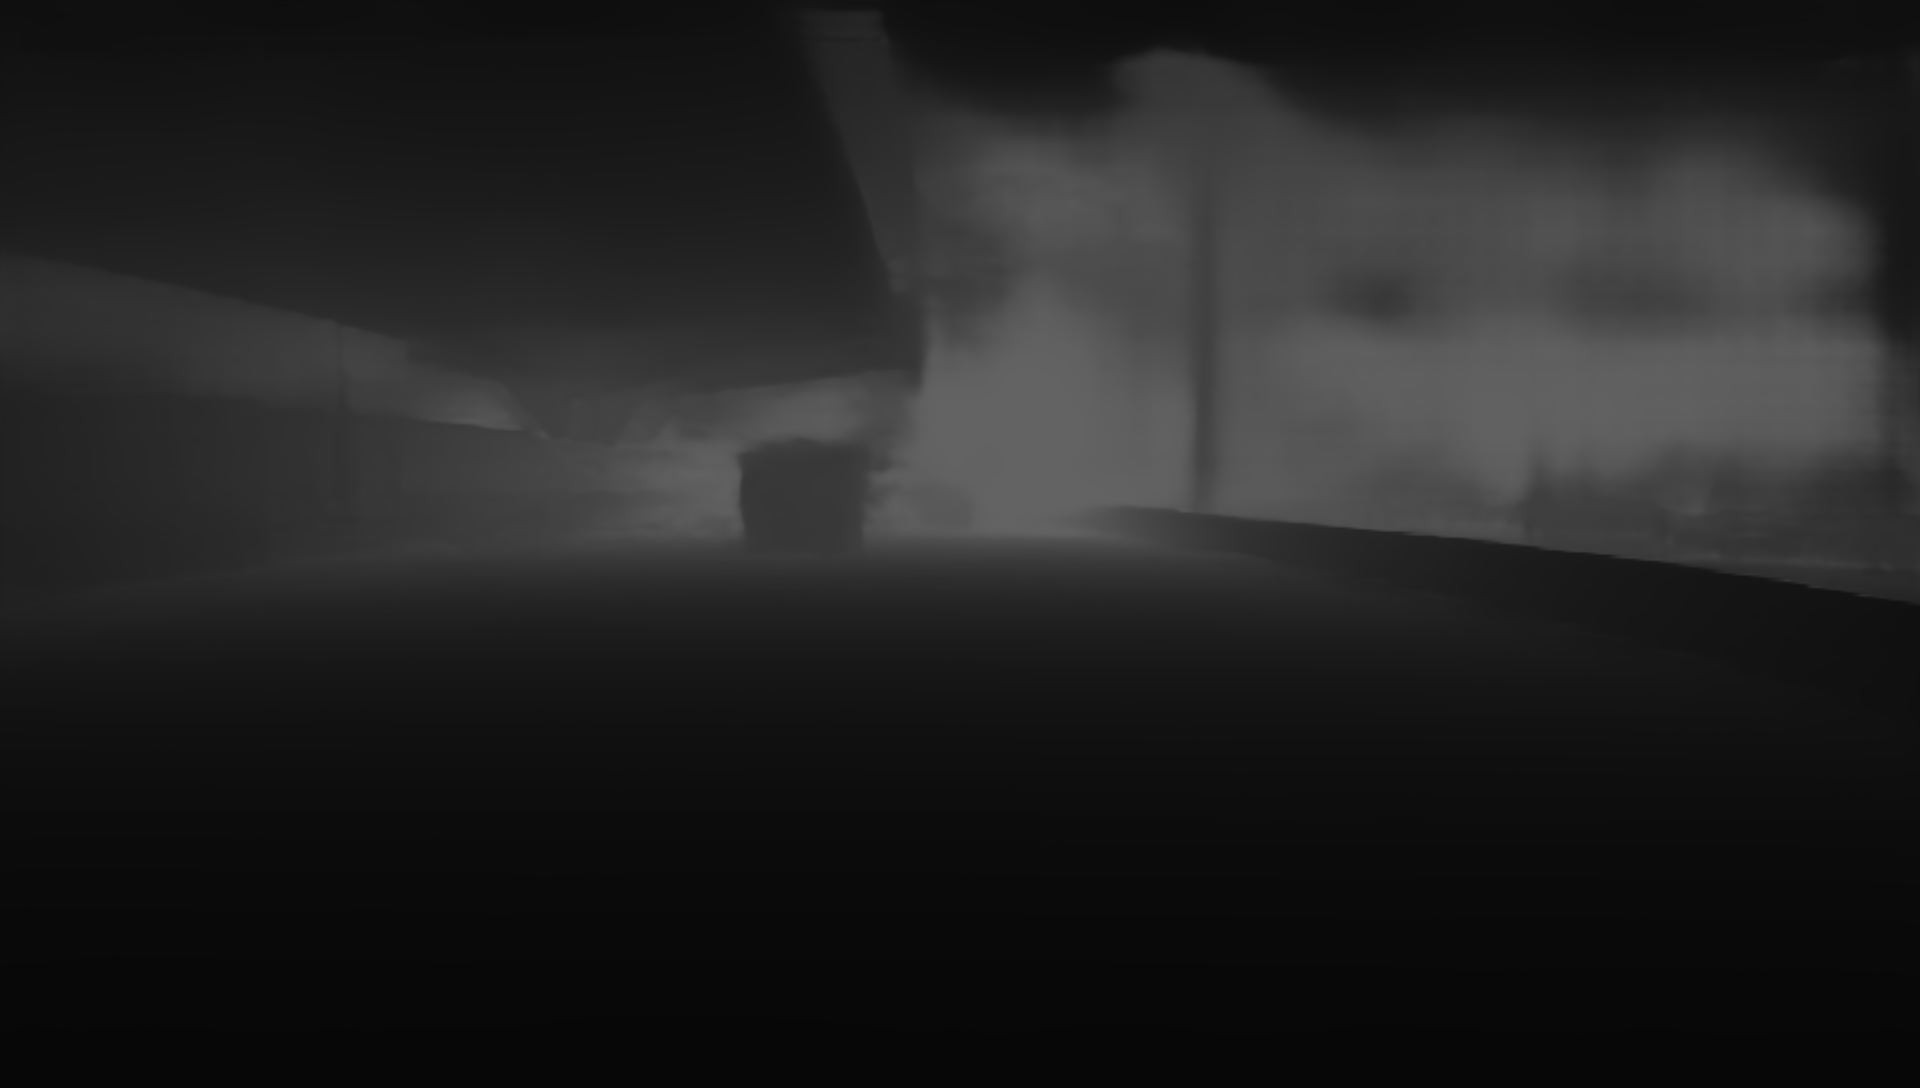

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(depth)

In [ ]:
import numpy as np
np.savetxt("image_data.csv", depth,fmt="%.0f", delimiter=",")

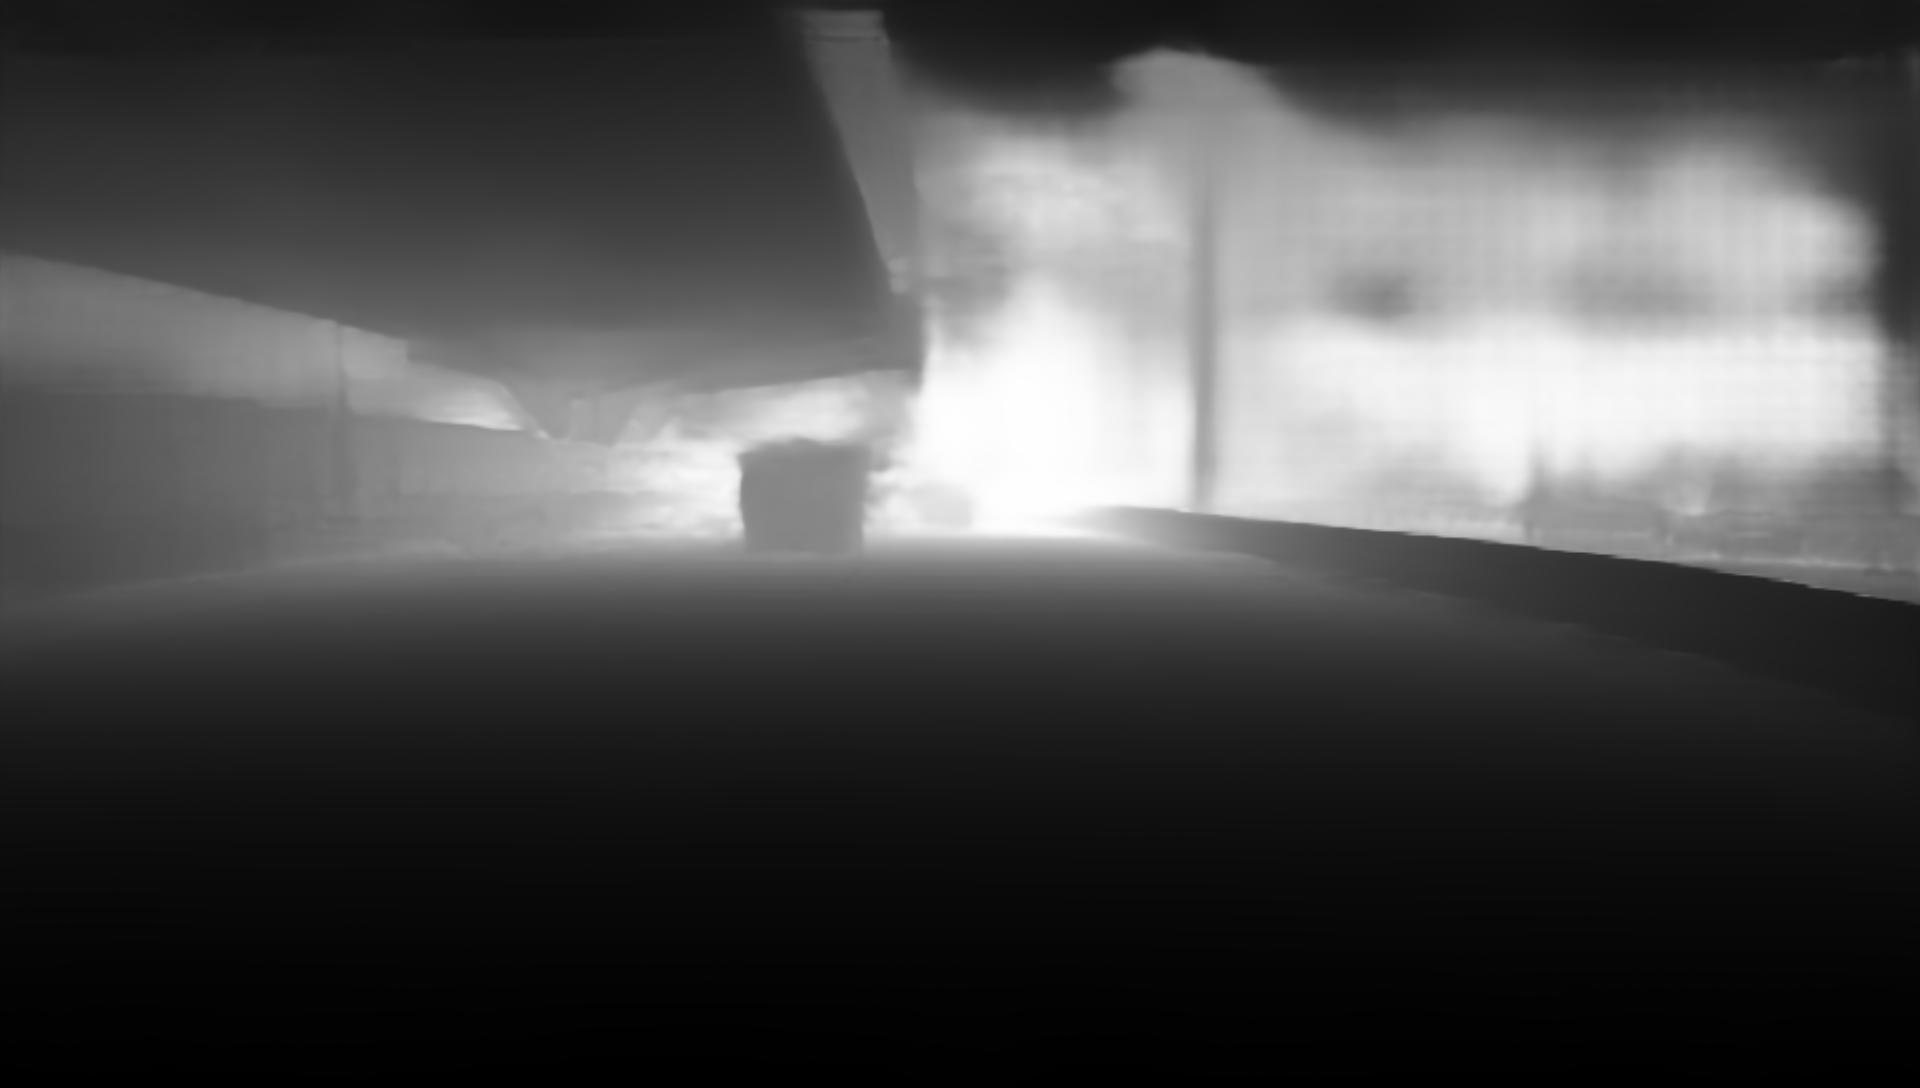

In [ ]:
# 正規化
lower = 0                                                         # 正規化の下限値
upper = 255                                                       # 正規化の上限値
result = cv2.normalize(depth, None, alpha=lower, beta=upper, norm_type=cv2.NORM_MINMAX)
cv2_imshow(result)

In [ ]:
depth.shape

(1088, 1920)